In [123]:
import json

In [124]:
geo = json.load(open('diaphantinh.geojson','r'))

In [125]:
geo['features'][0]

{'type': 'Feature',
 'properties': {'gid': 1, 'code': 'AD01', 'ten_tinh': 'An Giang'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[105.11524187400002, 10.955660896000017],
     [105.11462924600005, 10.946923054000111],
     [105.1038041100001, 10.932225292000018],
     [105.09732006500006, 10.92267923600012],
     [105.10156493000001, 10.920812300000103],
     [105.107523583, 10.919060767000042],
     [105.12843635500008, 10.923566429000074],
     [105.12933904900007, 10.923760866000086],
     [105.14527860200006, 10.924344837000087],
     [105.15753557100008, 10.923044120000023],
     [105.17210817900003, 10.915172694000129],
     [105.18066661600002, 10.913087368000072],
     [105.18712386600005, 10.913173943000041],
     [105.18718762100009, 10.912704181000075],
     [105.18761207900003, 10.909576617000114],
     [105.18900435200004, 10.896518163000033],
     [105.1891992920001, 10.888406492000067],
     [105.18879436500006, 10.883439919000091],
     [105.187989636000

In [126]:
import csv
density = {}
with open('mat-do-dan-so.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] != 'province':
            density[row[0]] = float(row[1])
density

{'CẢ NƯỚC': 280.0,
 'Đồng bằng sông Hồng': 994.0,
 'Hà Nội': 2182.0,
 'Vĩnh Phúc': 863.0,
 'Bắc Ninh': 1432.0,
 'Quảng Ninh': 198.0,
 'Hải Dương': 1070.0,
 'Hải Phòng': 1268.0,
 'Hưng Yên': 1258.0,
 'Thái Bình': 1128.0,
 'Hà Nam': 932.0,
 'Nam Định': 1110.0,
 'Ninh Bình': 687.0,
 'Trung du và miền núi phía Bắc': 126.0,
 'Hà Giang': 103.0,
 'Cao Bằng': 79.0,
 'Bắc Kạn': 66.0,
 'Tuyên Quang': 131.0,
 'Lào Cai': 108.0,
 'Yên Bái': 116.0,
 'Thái Nguyên': 348.0,
 'Lạng Sơn': 92.0,
 'Bắc Giang': 426.0,
 'Phú Thọ': 391.0,
 'Điện Biên': 58.0,
 'Lai Châu': 48.0,
 'Sơn La': 86.0,
 'Hoà Bình': 181.0,
 'Bắc Trung Bộ và Duyên hải miền Trung': 207.0,
 'Thanh Hoá': 317.0,
 'Nghệ An': 188.0,
 'Hà Tĩnh': 211.0,
 'Quảng Bình': 110.0,
 'Quảng Trị': 135.0,
 'Thừa Thiên - Huế': 235.0,
 'Đà Nẵng': 814.0,
 'Quảng Nam': 141.0,
 'Quảng Ngãi': 243.0,
 'Bình Định': 251.0,
 'Phú Yên': 179.0,
 'Khánh Hoà': 236.0,
 'Ninh Thuận': 179.0,
 'Bình Thuận': 154.0,
 'Tây Nguyên': 104.0,
 'Kon Tum': 52.0,
 'Gia Lai': 91.0,


In [127]:
geo_provinces = set(f['properties']['ten_tinh'] for f in geo['features'])
density_provinces = set(density.keys())
geo_provinces - density_provinces

{'Bà Rịa -Vũng Tàu',
 'Cần Thơn',
 'Hòa Bình',
 'Khánh Hòa',
 'Kien Giang',
 'Quản Bình',
 'Thanh Hóa',
 'Thừa Thiên Huế',
 'Đăk Lăk',
 'Đăk Nông'}

In [128]:
density_provinces - geo_provinces

{'Bà Rịa - Vũng Tàu',
 'Bắc Trung Bộ và Duyên hải miền Trung',
 'CẢ NƯỚC',
 'Cần Thơ',
 'Hoà Bình',
 'Khánh Hoà',
 'Kiên Giang',
 'Quảng Bình',
 'Thanh Hoá',
 'Thừa Thiên - Huế',
 'Trung du và miền núi phía Bắc',
 'Tây Nguyên',
 'Đông Nam Bộ',
 'Đắk Lắk',
 'Đắk Nông',
 'Đồng bằng sông Cửu Long',
 'Đồng bằng sông Hồng'}

In [129]:
corrections = {
    'Bà Rịa -Vũng Tàu': 'Bà Rịa - Vũng Tàu',
    'Cần Thơn': 'Cần Thơ',
    'Hòa Bình': 'Hoà Bình',
    'Khánh Hòa': 'Khánh Hoà',
    'Kien Giang': 'Kiên Giang',
    'Quản Bình': 'Quảng Bình',
    'Thanh Hóa': 'Thanh Hoá',
    'Đăk Lăk': 'Đắk Lắk',
    'Đăk Nông': 'Đắk Nông',
    'Thừa Thiên Huế':'Thừa Thiên - Huế',
    'TP.Hồ Chí Minh':'TP. Hồ Chí Minh'
}
for feature in geo['features']:
    name = feature['properties']['ten_tinh']
    if name in corrections:
        feature['properties']['ten_tinh'] = corrections[name]

for feature in geo['features']:
    # name = feature['properties']['ten_tinh']
    # feature['properties']['density'] = density[name]
    # del feature['properties']['code']
    feature['properties']['code'] = 'AD' + str(feature['properties']['gid'])
    del feature['properties']['gid']

In [130]:
geo_provinces = set(f['properties']['ten_tinh'] for f in geo['features'])
density_provinces = set(density.keys())
print(geo_provinces - density_provinces)

set()


In [131]:
with open('cleaned_geo.geojson','w') as f:
    json.dump(geo,f)

In [132]:
vn = json.load(open('cleaned_geo.geojson','r'))
vn_id_map = {}
for feature in vn['features']:
    id = feature['properties']['code']
    vn_id_map[feature['properties']['ten_tinh']] = id
vn_id_map

{'An Giang': 'AD1',
 'Bà Rịa - Vũng Tàu': 'AD2',
 'Bắc Giang': 'AD3',
 'Bắc Kạn': 'AD4',
 'Bạc Liêu': 'AD5',
 'Bắc Ninh': 'AD6',
 'Bến Tre': 'AD7',
 'Bình Định': 'AD8',
 'Bình Dương': 'AD9',
 'Bình Phước': 'AD10',
 'Bình Thuận': 'AD11',
 'Cà Mau': 'AD12',
 'Cần Thơ': 'AD13',
 'Cao Bằng': 'AD14',
 'Đà Nẵng': 'AD15',
 'Đắk Lắk': 'AD16',
 'Đắk Nông': 'AD17',
 'Điện Biên': 'AD18',
 'Đồng Nai': 'AD19',
 'Đồng Tháp': 'AD20',
 'Gia Lai': 'AD21',
 'Hà Giang': 'AD22',
 'Hà Nam': 'AD23',
 'Hà Nội': 'AD24',
 'Hà Tĩnh': 'AD25',
 'Hải Dương': 'AD26',
 'Hải Phòng': 'AD27',
 'Hậu Giang': 'AD28',
 'Hoà Bình': 'AD29',
 'Hưng Yên': 'AD30',
 'Khánh Hoà': 'AD31',
 'Kiên Giang': 'AD32',
 'Kon Tum': 'AD33',
 'Lai Châu': 'AD34',
 'Lâm Đồng': 'AD35',
 'Lạng Sơn': 'AD36',
 'Lào Cai': 'AD37',
 'Long An': 'AD38',
 'Nam Định': 'AD39',
 'Nghệ An': 'AD40',
 'Ninh Bình': 'AD41',
 'Ninh Thuận': 'AD42',
 'Phú Thọ': 'AD43',
 'Phú Yên': 'AD44',
 'Quảng Bình': 'AD45',
 'Quảng Nam': 'AD46',
 'Quảng Ngãi': 'AD47',
 'Quảng 

In [133]:
import pandas as pd
df = pd.read_csv('mat-do-dan-so.csv')
cleaned_density = []
for i in range(len(df['province'].values)):
    line = []
    if df['province'].values[i] in vn_id_map:
        cleaned_density.append([df['province'].values[i],df['density'].values[i]])
with open('cleaned_density.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['province','density'])
    writer.writerows(cleaned_density)

In [134]:
df = pd.read_csv('cleaned_density.csv')
df['code'] = df['province'].apply(lambda x: vn_id_map[x])
df.head(10)

,province,density,code
0,Hà Nội,2182.0,AD24
1,Vĩnh Phúc,863.0,AD62
2,Bắc Ninh,1432.0,AD6
3,Quảng Ninh,198.0,AD48
4,Hải Dương,1070.0,AD26
5,Hải Phòng,1268.0,AD27
6,Hưng Yên,1258.0,AD30
7,Thái Bình,1128.0,AD53
8,Hà Nam,932.0,AD23
9,Nam Định,1110.0,AD39


<AxesSubplot:>

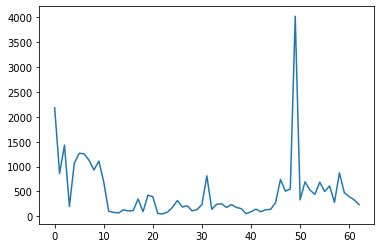

In [135]:
df['density'].plot()

<AxesSubplot:>

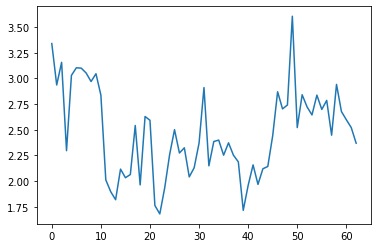

In [136]:
 import numpy as np
 df['densityScale'] = np.log10(df['density'])
 df['densityScale'].plot()

In [137]:
df.head(10)

,province,density,code,densityScale
0,Hà Nội,2182.0,AD24,3.338855
1,Vĩnh Phúc,863.0,AD62,2.936011
2,Bắc Ninh,1432.0,AD6,3.155943
3,Quảng Ninh,198.0,AD48,2.296665
4,Hải Dương,1070.0,AD26,3.029384
5,Hải Phòng,1268.0,AD27,3.103119
6,Hưng Yên,1258.0,AD30,3.099681
7,Thái Bình,1128.0,AD53,3.052309
8,Hà Nam,932.0,AD23,2.969416
9,Nam Định,1110.0,AD39,3.045323


In [138]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'firefox'

In [166]:
fig = px.choropleth(
    df, 
    geojson=vn, 
    locations="province",
    color="density",
    featureidkey="properties.ten_tinh",
    hover_name="province",
    hover_data=['density'],
    title="Vietnam Population Density",
    projection="mercator",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":30,"l":30,"b":0})
fig.show()